# Load Data

In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv("CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


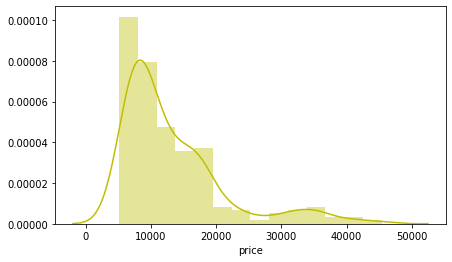

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.distplot(data['price'],color="y")

<Figure size 504x504 with 0 Axes>

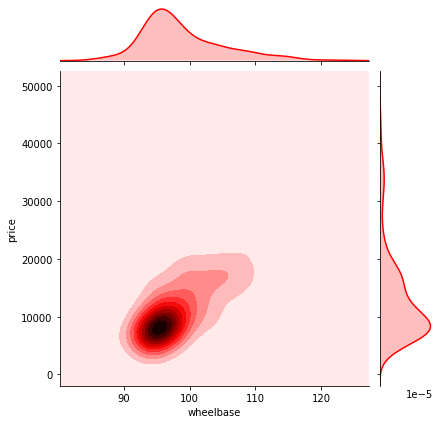

In [7]:
plt.figure(figsize=(7,7))
sns.jointplot(x="wheelbase",y="price",data=data,kind='kde',color='red')

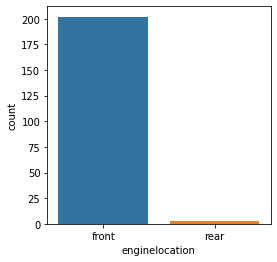

In [8]:
plt.figure(figsize=(4,4))
sns.countplot(data['enginelocation'])

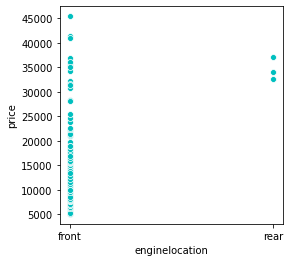

In [9]:
plt.figure(figsize=(4,4))
sns.scatterplot(data.enginelocation,data['price'],color=['c'])

# Data pre-processing

Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data['fuelsystem'] = lab.fit_transform(data['fuelsystem'])
data['cylindernumber'] = lab.fit_transform(data['cylindernumber'])
data['enginetype'] = lab.fit_transform(data['enginetype'])
data['enginelocation'] = lab.fit_transform(data['enginelocation'])
data['drivewheel'] = lab.fit_transform(data['drivewheel'])
data['carbody'] = lab.fit_transform(data['carbody'])
data['doornumber'] = lab.fit_transform(data['doornumber'])
data['aspiration'] = lab.fit_transform(data['aspiration'])
data['fueltype'] = lab.fit_transform(data['fueltype'])
data['CarName'] = lab.fit_transform(data['CarName'])

In [11]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Handle outliers using rank method.

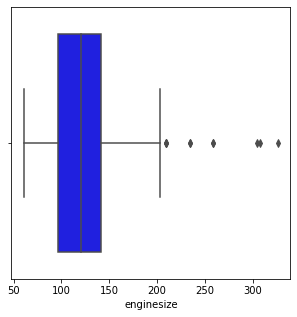

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(data['enginesize'], color = 'blue')

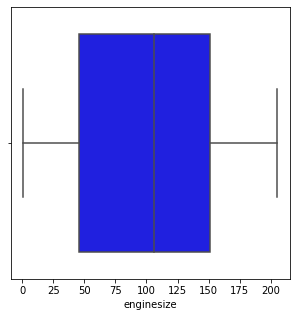

In [13]:
data['enginesize'] = data['enginesize'].rank()
plt.figure(figsize=(5,5))
sns.boxplot(data['enginesize'], color = 'blue')

Correlation Matrix

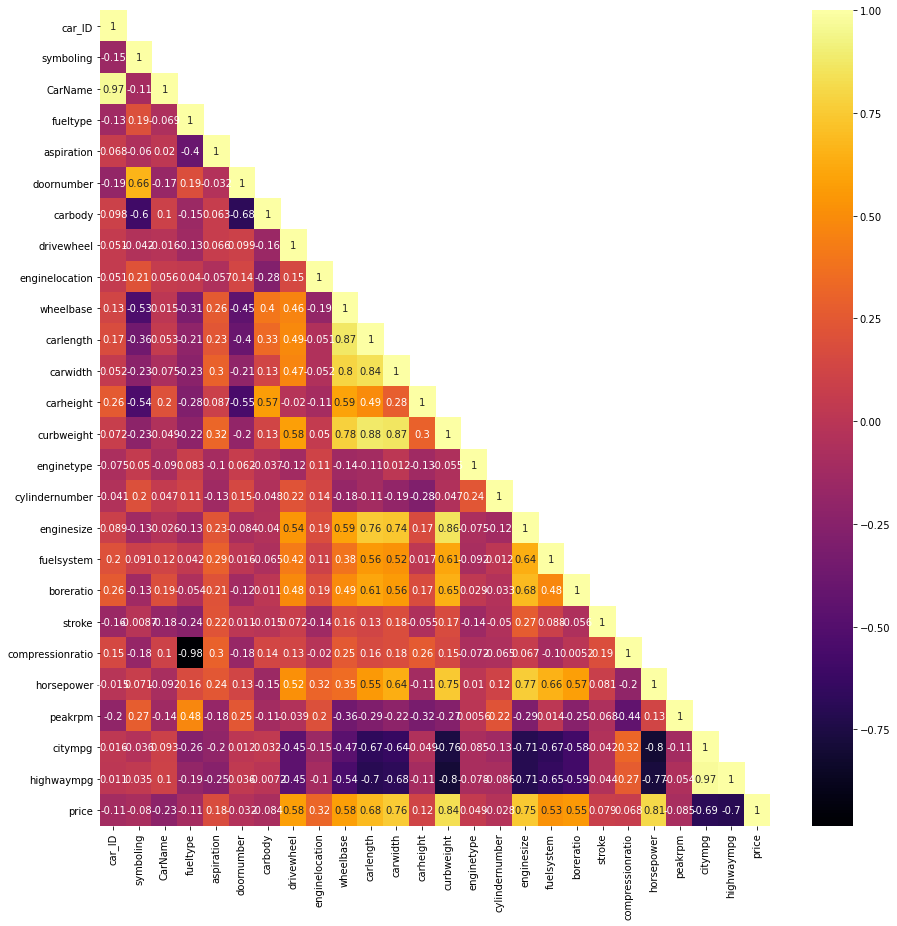

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

# Model

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [16]:
x = data.drop(['car_ID','price'],axis=1)
y = data['price']
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.1)
kfold = KFold(n_splits=5)

XGBoost Regeressor

In [28]:
xgb = XGBRegressor(n_estimators = 450, silent = 1, n_jobs = -1)
print('XGB Cross val score:', cross_val_score(xgb, x, y, cv=kfold))
xgb.fit(xtr, ytr)
yp = xgb.predict(xte)
print('XGB r2_score:',r2_score(yte,yp))

XGB Cross val score: [0.77388417 0.9327029  0.47630151 0.85272598 0.6281315 ]
XGB r2_score: 0.9495357492735306


RandomForest Regressor

In [26]:
rfr = RandomForestRegressor(n_estimators = 95, n_jobs = -1)
print('RFR Cross val score:', cross_val_score(rfr, x, y, cv=kfold))
rfr.fit(xtr, ytr)
yp = rfr.predict(xte)
print('RFR r2_score:',r2_score(yte,yp))

XGB Cross val score: [0.85018957 0.93445297 0.3761598  0.92356923 0.69412914]
RFR r2_score: 0.9614247508570001
